In [ ]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the paths
data_folder = "/content/drive/MyDrive/Oily-dataset"
output_folder = "/content/drive/My Drive/output_folder"


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)  # Choose an intermediate layer

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def extract_features(image_path, model, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

In [ ]:
feature_list = []
image_paths = []

In [ ]:
for file_name in os.listdir(data_folder):
    if file_name.endswith(".jpg"):
        image_path = os.path.join(data_folder, file_name)
        image_paths.append(image_path)
        features = extract_features(image_path, model, target_size=(224, 224))
        feature_list.append(features)

1/1 [==============================] - 1s 509ms/step


In [ ]:
X = np.array(feature_list)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


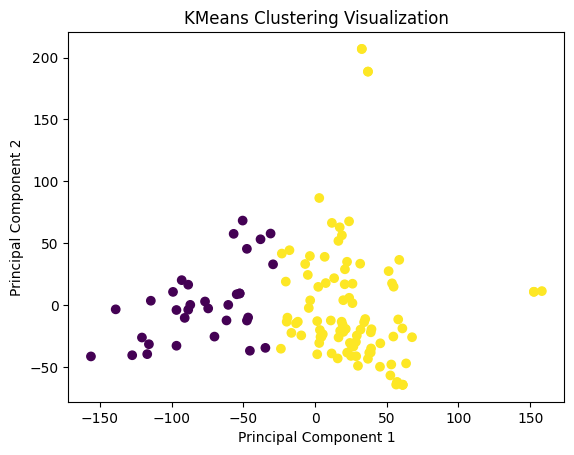

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans on the reduced feature vectors
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Create output folders for each cluster
for i in range(2):
    cluster_folder = os.path.join(output_folder, f"cluster_{i}")
    os.makedirs(cluster_folder, exist_ok=True)

In [ ]:
from shutil import copyfile
# Move images to respective folders based on clusters
for i, image_path in enumerate(image_paths):
    if not os.path.exists(image_path):
        print(f"Warning: Image not found - {image_path}")
        continue

    cluster_folder = os.path.join(output_folder, f"cluster_{y_kmeans[i]}")
    os.makedirs(cluster_folder, exist_ok=True)

    image_name = os.path.basename(image_path)
    output_path = os.path.join(cluster_folder, image_name)

    try:
        copyfile(image_path, output_path)
        print(f"Image {image_name} moved to {cluster_folder}")
    except Exception as e:
        print(f"Error moving image {image_name}: {str(e)}")

print("Clustering and saving images complete.")


Image oily 6.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 7.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 8.jpg moved to /content/drive/My Drive/output_folder/cluster_0
Image oily 9.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 10.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 11.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 12.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 13.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 14.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 15.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 16.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 17.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 18.jpg moved to /content/drive/My Drive/output_folder/cluster_1
Image oily 19.jpg moved to /c

IndexError: index 127 is out of bounds for axis 0 with size 127

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg

# Function to display sample images from a cluster
def display_sample_images(cluster_folder, num_samples=3):
    image_files = os.listdir(cluster_folder)[:num_samples]
    for image_file in image_files:
        image_path = os.path.join(cluster_folder, image_file)
        img = mpimg.imread(image_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.show()